In [1]:
## Importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,RidgeCV,LassoCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
import pickle
sns.set_style('whitegrid')

In [2]:
data=pd.read_csv('Real_Combine.csv')
data

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1085,11.3,22.3,4.7,1017.7,82.0,1.1,3.0,3.5,310.250000
1086,12.3,19.4,6.2,1016.8,80.0,1.3,6.7,25.9,204.375000
1087,11.1,20.6,3.6,1015.7,76.0,1.3,3.0,9.4,223.250000
1088,11.6,21.4,3.4,1017.1,76.0,1.1,2.4,5.4,248.958333


In [3]:
## Treating null values 
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    2
dtype: int64

In [4]:
## There is just one null value as while collecting the data we already treated them
data=data.dropna()

In [5]:
## Dividing Data into Independent and Dependent features
X=data.drop('PM 2.5',axis=1)
y=data['PM 2.5']

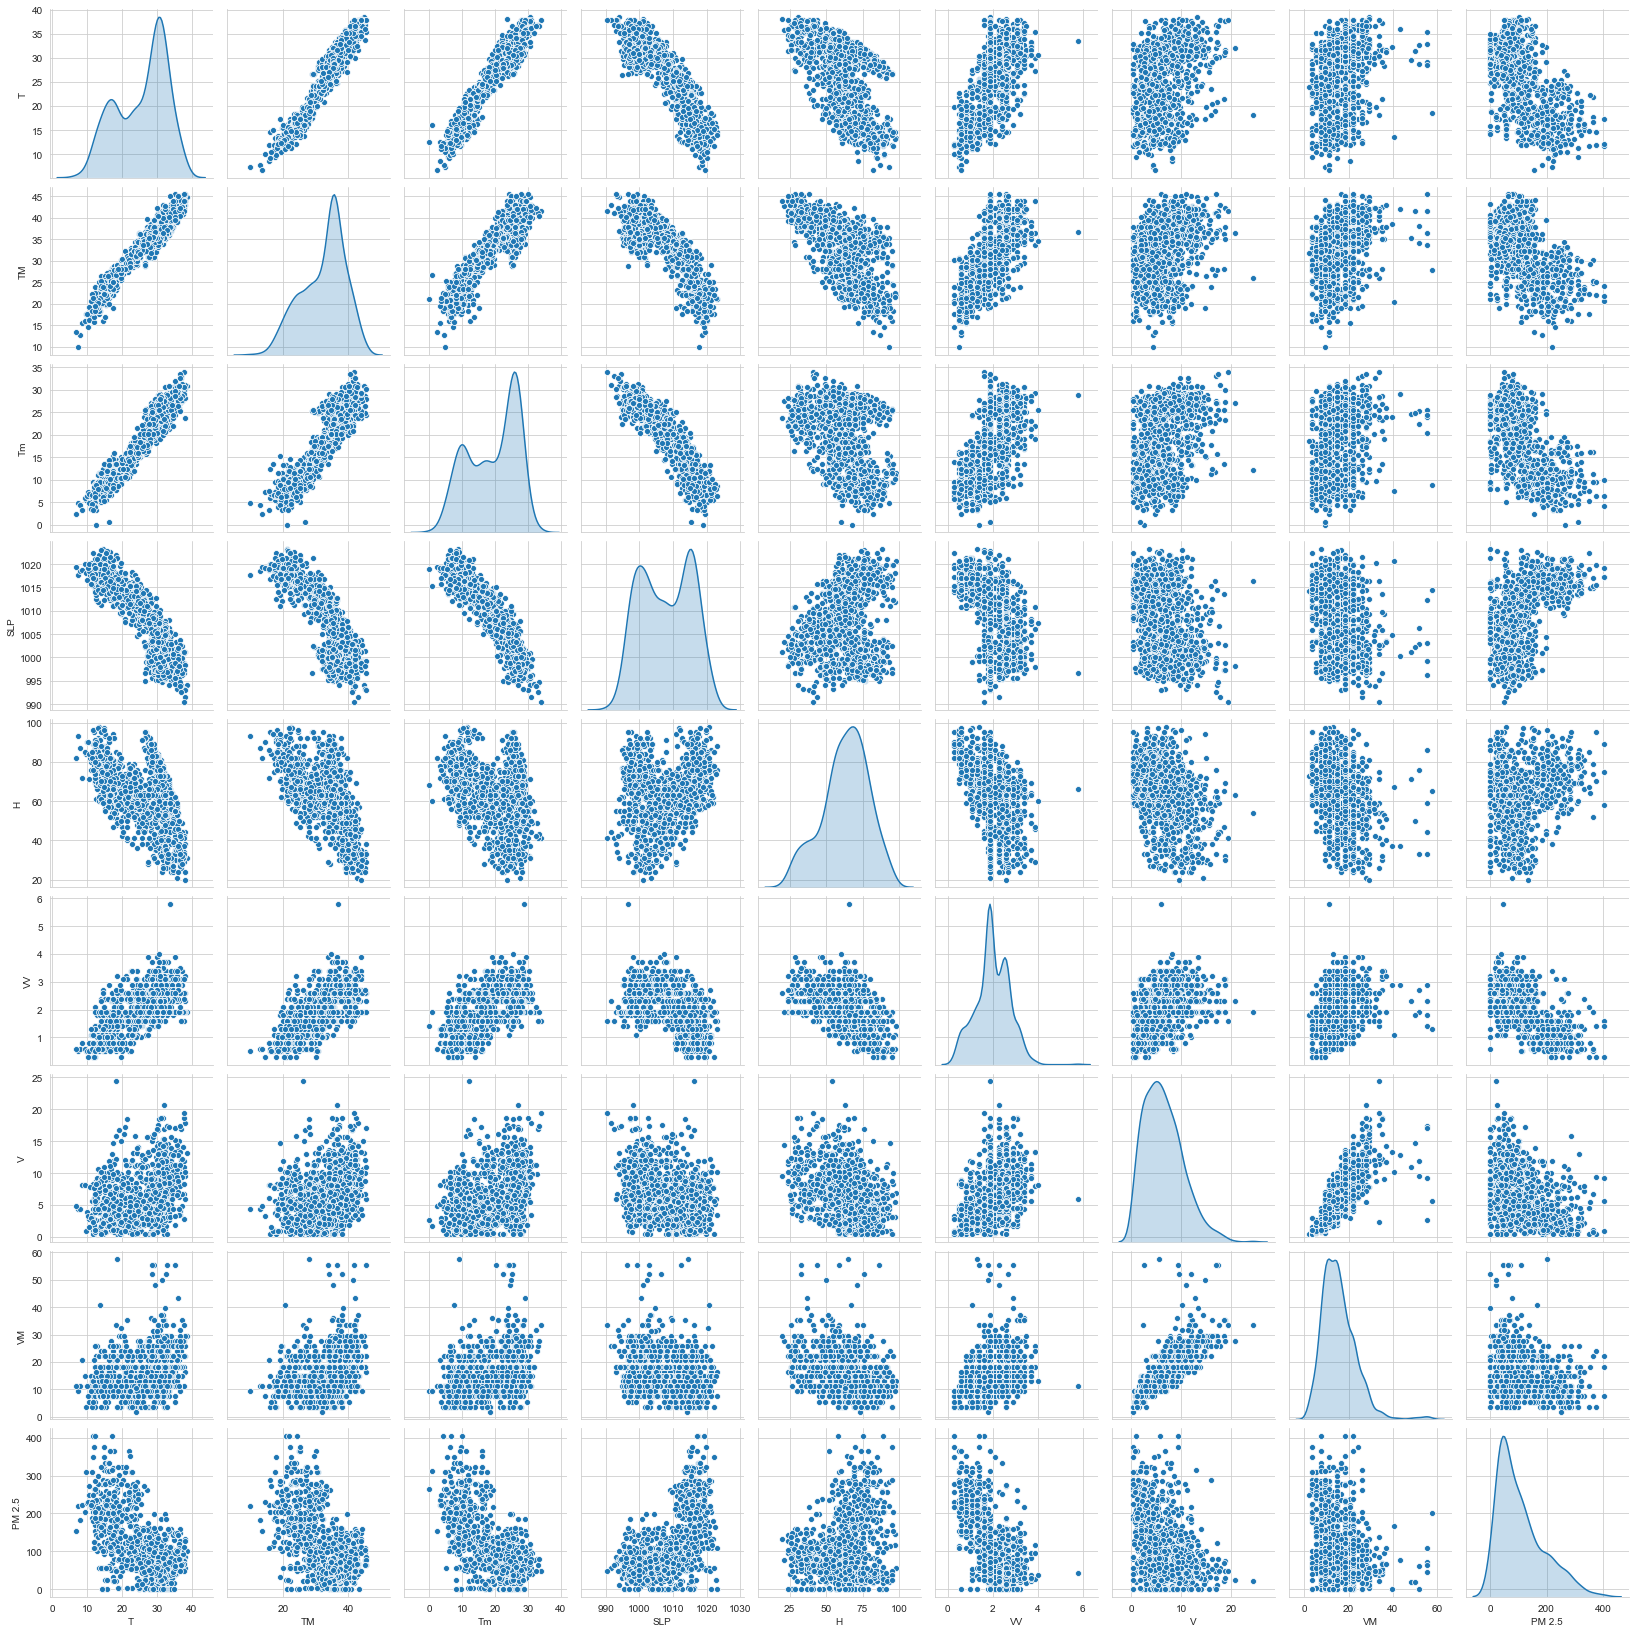

In [6]:
## Let's see the relationship between independent and target variables
sns.pairplot(data,diag_kind='kde')
plt.show()

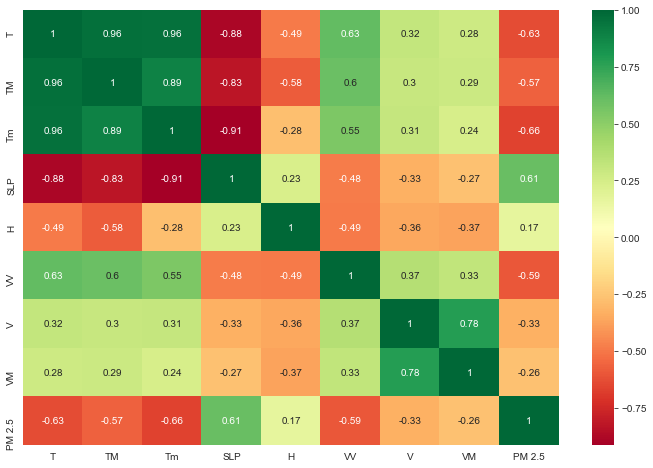

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [8]:
## We can see that some features are mutlicollinear
## Let's see which features are important/significant for modeling

### Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.


Feature Importance gives you a score for each feature of your data, the higher the score more important or relevant is the 
feature towards your output variable


Feature Importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Trees Regressor for 
extracting the top 10 features of your dataset

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [10]:
print(model.feature_importances_)

[0.17105747 0.09627436 0.20316674 0.14157447 0.07718595 0.20685442
 0.05857962 0.04530697]


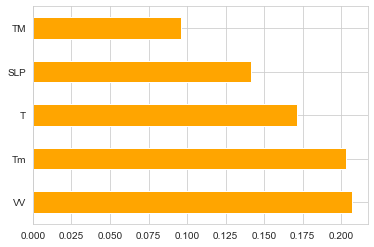

In [11]:
## Plot graph of feature importances for better visualization

feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh',color='orange')
plt.show()

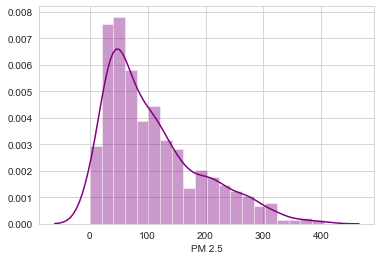

In [12]:
## Visualization of target variable
sns.distplot(y,color='purple')
plt.show()

In [13]:
data.skew()

T        -0.451265
TM       -0.516883
Tm       -0.372205
SLP      -0.022000
H        -0.395472
VV        0.009498
V         0.742455
VM        1.428031
PM 2.5    1.033539
dtype: float64

In [14]:
## We can see that target variable is right skewed but it is not so much.

## Modeling 

### Linear Regression

In [15]:
## Splitting Dataset into Train and Test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
print("Coefficient of determination: R^2 on train set is {}".format(regressor.score(X_train,y_train)))
print("Coefficient of determination: R^2 on test set is {}".format(regressor.score(X_test,y_test)))

Coefficient of determination: R^2 on train set is 0.5558460401426301
Coefficient of determination: R^2 on test set is 0.5002132050072754


In [18]:
## Cross validation score
np.mean(cross_val_score(regressor,X_train,y_train,cv=5,scoring='r2'))

0.5382325868000107

In [19]:
## So cross validation score is 0.57.

## Inference
## Linear Regression is not good fit here as our data is not linear wrt target variable

In [20]:
prediction=regressor.predict(X_test)

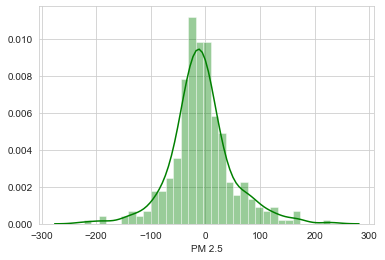

In [21]:
## Distplot for residuals
sns.distplot(y_test-prediction,color='green')

In [22]:
## Hence we can infer that residuals are normally distributed  (Normality assumpn)

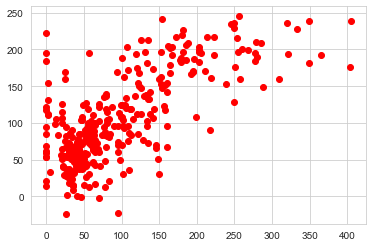

In [23]:
plt.scatter(y_test,prediction,c='red')
plt.show()

In [24]:
## Hence we can infer that mean of residuals is approximately zero or data is linear to some extent (Linearity assumpn)

### Other Regression Evaluation Metrics 

In [25]:
print("Mean squared error of test data is {}".format(mean_squared_error(y_test,prediction)))
print("Mean absolute error of test data is {}".format(mean_absolute_error(y_test,prediction)))
print("Root mean squared error of test data is {}".format(np.sqrt(mean_squared_error(y_test,prediction))))
print('Cross validation mean squared error is {}'.format(np.mean(np.abs(cross_val_score(regressor,X_train,y_train,cv=5,scoring='neg_mean_squared_error')))))

Mean squared error of test data is 3226.014432469144
Mean absolute error of test data is 40.54246531132519
Root mean squared error of test data is 56.798014335618674
Cross validation mean squared error is 3121.729532937074


In [26]:
## Hence from these errors we can infer that using Linear Regression is not a best approach here, Let;s try some
## ensemble methods and Deep Learning models to get better result.

In [27]:
file=open('regression_model.pkl','wb')
pickle.dump(regressor,file)

## Lasso and Ridge regression 

In [28]:
ridge=Ridge()

In [29]:
## To find best value of alpha, lets apply grid search
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [30]:
gsearch=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [31]:
gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [32]:
gsearch.best_params_

{'alpha': 10}

In [33]:
np.abs(gsearch.best_score_)  

3120.6785553589957

In [34]:
Ridgeregressor=Ridge(**gsearch.best_params_)
Ridgeregressor.fit(X_train,y_train)

Ridge(alpha=10)

In [35]:
prediction=Ridgeregressor.predict(X_test)

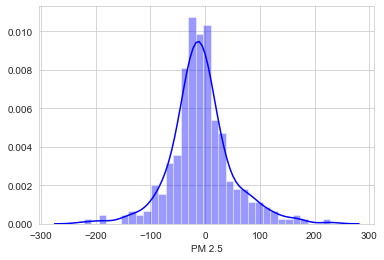

In [36]:
sns.distplot(y_test-prediction,color='blue')
plt.show()

In [37]:
## Thus residuals are almost normally distributed

In [38]:
## So, Mean squared error has reduced to some extent, although decrease is minor

## Lasso regression 

In [39]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lassosearch=GridSearchCV(lasso,parameters,cv=5,scoring='neg_mean_squared_error')
lassosearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [40]:
print(gsearch.best_params_)
print(np.abs(gsearch.best_score_))

{'alpha': 10}
3120.6785553589957


In [41]:
## Clearly there is minor difference in mse of ridge and lasso regression
## Lasso generally performs good when there are alot of features as it actually penalizes the least significant feature and 
## thus helps in feature selection.

In [42]:
Lassoregressor=Lasso(**lassosearch.best_params_)
Lassoregressor.fit(X_train,y_train)

Lasso(alpha=1)

In [43]:
prediction=Lassoregressor.predict(X_test)

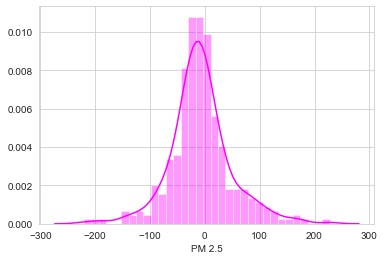

In [44]:
sns.distplot(y_test-prediction,color='magenta')
plt.show()

In [45]:
Lassoregressor.coef_

array([  0.        ,   0.35195166,  -5.28785043,   0.41491056,
        -0.78527754, -39.9441062 ,  -1.92450524,   0.        ])

In [46]:
## Thus residuals are almost normally distributed

### Other evaluation metrics 

In [47]:
print("Coefficient of Determination R^2 is {}".format(r2_score(y_test,prediction)))
print("Mean squared error of test data is {}".format(mean_squared_error(y_test,prediction)))
print("Mean absolute error of test data is {}".format(mean_absolute_error(y_test,prediction)))
print("Root mean squared error of test data is {}".format(np.sqrt(mean_squared_error(y_test,prediction))))
print('Cross validation mean squared error is {}'.format(np.mean(np.abs(cross_val_score(Lassoregressor,X_train,y_train,cv=5,scoring='neg_mean_squared_error')))))

Coefficient of Determination R^2 is 0.4985101719145716
Mean squared error of test data is 3237.0071385411707
Mean absolute error of test data is 40.62280748336152
Root mean squared error of test data is 56.89470220100612
Cross validation mean squared error is 3105.3711427524613


In [48]:
## Lets dump this model using Pickle

In [49]:
file=open('lasso_regression.pkl','wb')
pickle.dump(Lassoregressor,file)

## Decision Tree Regressor

In [50]:
dtree=DecisionTreeRegressor(criterion='mse')

In [51]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
print("Coefficient of determination R^2 on train set is: {}".format(dtree.score(X_train,y_train)))
print("Coefficient of determination R^2 on test set is: {}".format(dtree.score(X_test,y_test)))
print("Cross validation score is: {}".format(np.mean(cross_val_score(dtree,X_train,y_train,cv=5,))))

Coefficient of determination R^2 on train set is: 1.0
Coefficient of determination R^2 on test set is: 0.20174158787155838
Cross validation score is: 0.22220978053768894


In [53]:
## Clearly, there is high overfitting

In [54]:
prediction=dtree.predict(X_test)

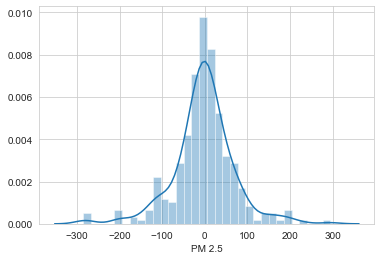

In [55]:
sns.distplot(y_test-prediction)
plt.show()

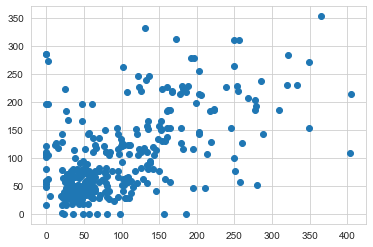

In [56]:
plt.scatter(y_test,prediction)

## Hyperparameter tuning

In [57]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [58]:
params={"splitter":['best','random'],'max_depth':[3,4,5,6,8,10,12,15],'min_samples_leaf':[1,2,3,4,5],'max_features':["auto",
                                                                                                                    "log2",'sqrt',None],'max_leaf_nodes':[None,10,20,30,40,50,60,70]}

In [59]:
import time
tic=time.time()
gsearch=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-10,cv=10)
gsearch.fit(X_train,y_train)
toc=time.time()
print("Total time in execution: {}".format(toc-tic))

Total time in execution: 501.13897013664246


In [60]:
gsearch.best_params_

{'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 5,
 'splitter': 'random'}

In [61]:
np.abs(gsearch.best_score_)

2851.8977363032795

In [62]:
dtree=DecisionTreeRegressor(**gsearch.best_params_)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=20, min_samples_leaf=5,
                      splitter='random')

In [63]:
prediction=dtree.predict(X_test)

In [64]:
print("Coefficient of Determination R^2 is {}".format(r2_score(y_test,prediction)))
print("Mean squared error of test data is {}".format(mean_squared_error(y_test,prediction)))
print("Mean absolute error of test data is {}".format(mean_absolute_error(y_test,prediction)))
print("Root mean squared error of test data is {}".format(np.sqrt(mean_squared_error(y_test,prediction))))
print('Cross validation mean squared error is {}'.format(np.mean(np.abs(cross_val_score(dtree,X_train,y_train,cv=5,scoring='neg_mean_squared_error')))))

Coefficient of Determination R^2 is 0.4936036549310352
Mean squared error of test data is 3268.6776323609884
Mean absolute error of test data is 41.91953412786247
Root mean squared error of test data is 57.17235024346112
Cross validation mean squared error is 3249.359345980226


In [65]:
# Dumping this model using pickle
file=open('Decision_tree_regressor.pkl','wb')
pickle.dump(dtree,file)

## Random Forest Regressor

In [66]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
print("Coefficient of determination R^2 on train set is: {}".format(rf.score(X_train,y_train)))
print("Coefficient of determination R^2 on test set is: {}".format(rf.score(X_test,y_test)))
print("Cross validation score is: {}".format(np.mean(cross_val_score(rf,X_train,y_train,cv=5))))

Coefficient of determination R^2 on train set is: 0.9418118836286444
Coefficient of determination R^2 on test set is: 0.5670506340460636
Cross validation score is: 0.5956355197546299


In [68]:
## Overfitting has reduced to some extent
## Let's apply randomised search to get more generalized result

In [69]:
prediction=rf.predict(X_test)

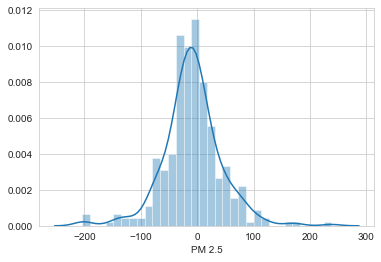

In [70]:
sns.distplot(y_test-prediction)
plt.show()

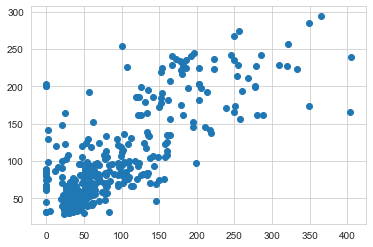

In [71]:
plt.scatter(y_test,prediction)
plt.show()

## Hyperparameter tuning 

In [72]:
RandomForestRegressor()

RandomForestRegressor()

In [73]:
#Number of trees in Random Forest
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
#Number of features to consider at each split
max_features=['auto','sqrt']
#Maximum no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,6)]
#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [74]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [75]:
tic=time.time()
rsearch=RandomizedSearchCV(rf,param_distributions=random_grid,cv=5,scoring='neg_mean_squared_error',random_state=42,n_iter=100)
rsearch.fit(X_train,y_train)
toc=time.time()
print("Total time in execustion is {}".format(toc-tic))

Total time in execustion is 2365.5069584846497


In [76]:
rsearch.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [77]:
rsearch.best_score_

-2666.84877889851

In [78]:
rf=RandomForestRegressor(n_estimators=1000,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=15)
rf.fit(X_train,y_train)
prediction=rsearch.predict(X_test)

In [79]:
print("Coefficient of Determination R^2 is {}".format(r2_score(y_test,prediction)))
print("Mean squared error of test data is {}".format(mean_squared_error(y_test,prediction)))
print("Mean absolute error of test data is {}".format(mean_absolute_error(y_test,prediction)))
print("Root mean squared error of test data is {}".format(np.sqrt(mean_squared_error(y_test,prediction))))
print('Cross validation mean squared error is {}'.format(np.mean(np.abs(cross_val_score(dtree,X_train,y_train,cv=5,scoring='neg_mean_squared_error')))))

Coefficient of Determination R^2 is 0.5671066687960933
Mean squared error of test data is 2794.23175677096
Mean absolute error of test data is 37.590565247885905
Root mean squared error of test data is 52.86049334589075
Cross validation mean squared error is 3141.507257361171


In [80]:
## Tuned RF is performing till now!

In [81]:
##Let's dump this model using pickle
file=open('Random_forest_regressor.pkl','wb')
pickle.dump(rf,file)

## XGBoost Regressor 

In [82]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
print("Coefficient of determination R^2 on train set is: {}".format(xgb.score(X_train,y_train)))
print("Coefficient of determination R^2 on test set is: {}".format(xgb.score(X_test,y_test)))
print("Cross validation score is: {}".format(np.mean(cross_val_score(xgb,X_train,y_train,cv=5))))

Coefficient of determination R^2 on train set is: 0.9990989069798523
Coefficient of determination R^2 on test set is: 0.5101091881334536
Cross validation score is: 0.5321388364305257


In [84]:
prediction=xgb.predict(X_test)

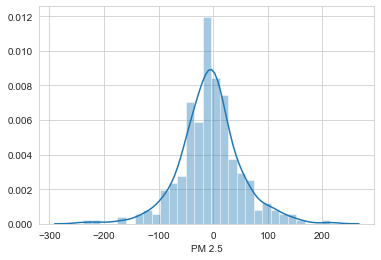

In [85]:
sns.distplot(y_test-prediction)
plt.show()

## Hyperparameter Tuning 

In [86]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [87]:
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
learning_rate=[0.05,0.1,0.2,0.3,0.5,0.6]
max_depth=[int(x) for x in np.linspace(5,30,6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

In [88]:
random_grid={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'subsample':subsample,'min_child_weight':
            min_child_weight}

In [89]:
tic=time.time()
rsearch=RandomizedSearchCV(xgb,param_distributions=random_grid,cv=5,scoring='neg_mean_squared_error',n_iter=100,random_state=42)
rsearch.fit(X_train,y_train)
toc=time.time()
print("Time taken in execution is {}".format(toc-tic))

Time taken in execution is 3652.590356349945


In [90]:
rsearch.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': 0.05}

In [91]:
rsearch.best_score_

-2867.922420613384

In [92]:
prediction=xgb.predict(X_test)

In [93]:
print("Coefficient of Determination R^2 is {}".format(r2_score(y_test,prediction)))
print("Mean squared error of test data is {}".format(mean_squared_error(y_test,prediction)))
print("Mean absolute error of test data is {}".format(mean_absolute_error(y_test,prediction)))
print("Root mean squared error of test data is {}".format(np.sqrt(mean_squared_error(y_test,prediction))))
print('Cross validation mean squared error is {}'.format(np.mean(np.abs(cross_val_score(xgb,X_train,y_train,cv=5,scoring='neg_mean_squared_error')))))

Coefficient of Determination R^2 is 0.5101091881334536
Mean squared error of test data is 3162.1380261527534
Mean absolute error of test data is 40.555420928628436
Root mean squared error of test data is 56.23289096385454
Cross validation mean squared error is 3150.7021382893104


## KNN 

In [94]:
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [95]:
print("Coefficient of determination R^2 on train set is: {}".format(knn.score(X_train,y_train)))
print("Coefficient of determination R^2 on test set is: {}".format(knn.score(X_test,y_test)))
print("Cross validation score is: {}".format(np.mean(cross_val_score(knn,X_train,y_train,cv=5))))

Coefficient of determination R^2 on train set is: 0.6561835751899847
Coefficient of determination R^2 on test set is: 0.4070975211228962
Cross validation score is: 0.4200359610915284


In [96]:
prediction=knn.predict(X_test)

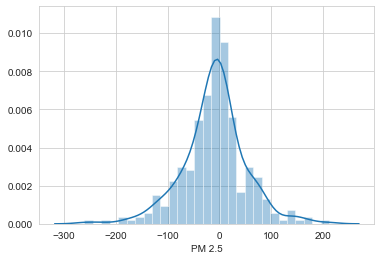

In [97]:
sns.distplot(y_test-prediction)
plt.show()

## ANN 

In [98]:
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,ReLU,ELU,PReLU,Dropout


In [99]:
model=Sequential()

##Input layer
model.add(Dense(128,kernel_initializer='normal',input_dim=X_train.shape[1]))

##Hidden layers
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))

##Output layer
model.add(Dense(1,kernel_initializer='normal',activation='linear'))

##Compile the network
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])
model.summary()

##Fitting the model to training set
ann=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
51/51 [==============================] - 0s 8ms/step - loss: 67.8923 - mean_absolute_error: 67.8923 - va

Epoch 44/100
51/51 [==============================] - 0s 4ms/step - loss: 42.0998 - mean_absolute_error: 42.0998 - val_loss: 40.8758 - val_mean_absolute_error: 40.8758
Epoch 45/100
51/51 [==============================] - 0s 3ms/step - loss: 42.0947 - mean_absolute_error: 42.0947 - val_loss: 42.8468 - val_mean_absolute_error: 42.8468
Epoch 46/100
51/51 [==============================] - 0s 3ms/step - loss: 43.1470 - mean_absolute_error: 43.1470 - val_loss: 45.8793 - val_mean_absolute_error: 45.8793
Epoch 47/100
51/51 [==============================] - 0s 3ms/step - loss: 40.1336 - mean_absolute_error: 40.1336 - val_loss: 40.7098 - val_mean_absolute_error: 40.7098
Epoch 48/100
51/51 [==============================] - 0s 3ms/step - loss: 44.3323 - mean_absolute_error: 44.3323 - val_loss: 48.1647 - val_mean_absolute_error: 48.1647
Epoch 49/100
51/51 [==============================] - 0s 3ms/step - loss: 41.9324 - mean_absolute_error: 41.9324 - val_loss: 41.7721 - val_mean_absolute_error: 

Epoch 93/100
51/51 [==============================] - 0s 4ms/step - loss: 39.3750 - mean_absolute_error: 39.3750 - val_loss: 40.7860 - val_mean_absolute_error: 40.7860
Epoch 94/100
51/51 [==============================] - 0s 4ms/step - loss: 39.0573 - mean_absolute_error: 39.0573 - val_loss: 47.4482 - val_mean_absolute_error: 47.4482
Epoch 95/100
51/51 [==============================] - 0s 4ms/step - loss: 41.5666 - mean_absolute_error: 41.5666 - val_loss: 40.6209 - val_mean_absolute_error: 40.6209
Epoch 96/100
51/51 [==============================] - 0s 4ms/step - loss: 39.7387 - mean_absolute_error: 39.7387 - val_loss: 39.9808 - val_mean_absolute_error: 39.9808
Epoch 97/100
51/51 [==============================] - 0s 4ms/step - loss: 40.7999 - mean_absolute_error: 40.7999 - val_loss: 41.3931 - val_mean_absolute_error: 41.3931
Epoch 98/100
51/51 [==============================] - 0s 4ms/step - loss: 39.3308 - mean_absolute_error: 39.3308 - val_loss: 40.6820 - val_mean_absolute_error: 

In [100]:
prediction=model.predict(X_test)

In [101]:
print("Coefficient of Determination R^2 is {}".format(r2_score(y_test,prediction)))
print("Mean squared error of test data is {}".format(mean_squared_error(y_test,prediction)))
print("Mean absolute error of test data is {}".format(mean_absolute_error(y_test,prediction)))
print("Root mean squared error of test data is {}".format(np.sqrt(mean_squared_error(y_test,prediction))))

Coefficient of Determination R^2 is 0.5012628343816667
Mean squared error of test data is 3219.239304465654
Mean absolute error of test data is 37.58752520266659
Root mean squared error of test data is 56.738340691860685


In [102]:
## Taking Random Forest Regressor as the best model because it is giving good score among all the other regressors.